<a href="https://colab.research.google.com/github/MicroPyscho/MicroPyscho/blob/main/PlaceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install evidently
!pip install facets-overview
!pip install yfinance
!pip install pandas stata-merge
!pip install plotly==5.20.0
!pip install --upgrade hvplot
!pip install --upgrade holoviews
!pip install lasio
!pip install -U ipykernel
!pip install --upgrade panel


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 523.0/523.0 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.8/230.8 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.3/210.3 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [5]:
import pandas as pd
import plotly.express as px
import lasio as ls
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot
import hvplot.pandas
import holoviews as hv
import panel as pn
import gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials

from google.colab import output
output.enable_custom_widget_manager()


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
file_path = "/content/drive/MyDrive/FinalDataset.dta"
df = pd.read_stata(file_path)

In [8]:
df.head(None)

DSCD    ticker          ISIN  ICBIC             ICBIN  fic  \
0      92174E  EMAARDEV  AEE001901017     35       Real Estate  ARE   
1      35963J      NMDC  AEN000401010     50       Industrials  ARE   
2      50814V     SCIDC  AES000401019     50       Industrials  ARE   
3      50577H       NCC  AEN000901019     50       Industrials  ARE   
4      35963C      GCEM  AEG000101010     50       Industrials  ARE   
...       ...       ...           ...    ...               ...  ...   
97458  86778N      ZMBF  ZM0000000201     45  Consumer Staples  ZMB   
97459  75895D      NATB  ZM0000000086     45  Consumer Staples  ZMB   
97460  683008      ZSUG  ZM0000000052     55   Basic Materials  ZMB   
97461  86778N      ZMBF  ZM0000000201     45  Consumer Staples  ZMB   
97462  32009X      ZMBF  ZM0000000201     45  Consumer Staples  ZMB   

                    country                     currency  \
0      United Arab Emirates  United Arab Emirates Dirham   
1      United Arab Emirates  United Arab Emirates Dirham   
2      United Arab Emirates  United Arab Emirates Dirham   
3      United Arab Emirates  United Arab Emirates Dirham   
4      United Arab Emirates  United Arab Emirates Dirham   
...                     ...                          ...   
97458                Zambia         United States Dollar   
97459                Zambia               Zambian Kwacha   
97460                Zambia               Zambian Kwacha   
97461                Zambia         United States Dollar   
97462                Zambia               Zambian Kwacha   

                     exchange  startdate  ...  climate_economic  \
0      Dubai Financial Market        NaT  ...          0.710840   
1                   Abu Dhabi        NaT  ...          0.710840   
2                   Abu Dhabi        NaT  ...          0.710840   
3      Dubai Financial Market        NaT  ...          0.710840   
4                   Abu Dhabi        NaT  ...          0.710840   
...                       ...        ...  ...               ...   
97458          Non NASDAQ OTC 2013-06-26  ...          0.413829   
97459                  Lusaka 2011-01-03  ...               NaN   
97460                  Lusaka 2011-01-03  ...               NaN   
97461          Non NASDAQ OTC 2013-06-26  ...               NaN   
97462                  Lusaka 2011-01-03  ...               NaN   

       climate_governance  climate_readiness_delta  climate_readiness  \
0                0.691174                -0.085728           0.584707   
1                0.691174                -0.085728           0.584707   
2                0.691174                -0.085728           0.584707   
3                0.691174                -0.085728           0.584707   
4                0.691174                -0.085728           0.584707   
...                   ...                      ...                ...   
97458            0.404942                -0.025261           0.323668   
97459                 NaN                      NaN                NaN   
97460                 NaN                      NaN                NaN   
97461                 NaN                      NaN                NaN   
97462                 NaN                      NaN                NaN   

       climate_social  ai_ranking   ai_score    ai_govt    ai_tech    ai_infr  
0            0.352107        16.0  72.395164  82.534294  51.880657  82.770538  
1            0.352107        16.0  72.395164  82.534294  51.880657  82.770538  
2            0.352107        16.0  72.395164  82.534294  51.880657  82.770538  
3            0.352107        16.0  72.395164  82.534294  51.880657  82.770538  
4            0.352107        16.0  72.395164  82.534294  51.880657  82.770538  
...               ...         ...        ...        ...        ...        ...  
97458        0.152233       133.0  31.214437  35.083679  21.932634  36.626999  
97459             NaN       146.0  29.631393  31.552050  19.591747  37.750381  
97460             NaN       146.0

In [9]:
print(df.tail(20))

         DSCD ticker          ISIN  ICBIC                   ICBIN  fic  \
97443  9110D0    KAL  ZAE000244711     40  Consumer Discretionary  ZAF   
97444  51744K    MRF  ZAE000060000     55         Basic Materials  ZAF   
97445  88092T   SBSW  US82575P1075     55         Basic Materials  ZAF   
97446  683017   LAFA  ZM0000000011     50             Industrials  ZMB   
97447  683008   ZSUG  ZM0000000052     55         Basic Materials  ZMB   
97448  75895D   NATB  ZM0000000086     45        Consumer Staples  ZMB   
97449  32009X   ZMBF  ZM0000000201     45        Consumer Staples  ZMB   
97450  86778N   ZMBF  ZM0000000201     45        Consumer Staples  ZMB   
97451  75895F   ZMFA  ZM0000000243     10              Technology  ZMB   
97452  53502U   ATEL  ZM0000000342     15      Telecommunications  ZMB   
97453  32009X   ZMBF  ZM0000000201     45        Consumer Staples  ZMB   
97454  53502U   ATEL  ZM0000000342     15      Telecommunications  ZMB   
97455  683008   ZSUG  ZM0000000052    

In [10]:
df.shape

(97463, 912)

In [11]:
df.isna().any().sum()

814

In [12]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

miss_df = df.isna().sum()
missv_df = pd.DataFrame(miss_df, columns=["Missing Values"])
missv_df = missv_df.T

print(missv_df)

print("\nData types of all columns:")
print(df.dtypes)
print ("total variables with missing values:", df.isna().any().sum())

                DSCD  ticker  ISIN  ICBIC  ICBIN  fic  country  currency  \
Missing Values     0       0     0      0      0    0        0         0   

                exchange  startdate  startyear  WC06011  WC07040  INCORP  \
Missing Values         0      59513          8       26     2046    7164   

                year  _EPS  _EPS1MN  _EPS1NE  _EPS1NET  _EPS2MN   _MV  _MVC  \
Missing Values     0  5732    53242    53242     53682    53650  3244  3490   

                  _P   _PI   _RI  _WC01001  _WC01016  _WC01051  _WC01075  \
Missing Values  6636  6987  6891         0     97463        24     97453   

                _WC01076  _WC01084  _WC01100  _WC01101  _WC01151  _WC01201  \
Missing Values     97463     22451        24      7768         0         0   

                _WC01249  _WC01250  _WC01251  _WC01266  _WC01401  _WC01451  \
Missing Values         2         0      1882     18141        22        17   

                _WC01501  _WC01551  _WC01651  _WC01706  _WC01751  _W

In [13]:
def select_df(df, selected_df):
  return df[selected_df]

selected_df = ["ticker", "ISIN", "ICBIC", "ICBIN", "fic", "country", "exchange", "startyear", "WC06011", "WC07040", "INCORP", "year", "_EPS", "_MV", "_P", "_PI", "_RI", "_WC01001", "_WC01201", "_WC01651", "_WC02001", "_WC02999", "_WC03351", "_WC03999", "_WC04049", "_WC08001", "_WC02201", "_WC18193", "SIC", "ffi48", "age", "logage", "size", "logsales", "tlta", "logmktcap", "clta", "cata", "apta", "arta", "cfw", "roa", "lroa", "roe", "lroe", "tobinq", "ltobinq", "mktvalue", "mb", "_CGSCORE", "_CGVSDP050", "_CGVSDP026", "_CGVSDP054", "_ENERDP0051", "_ENERDP013", "_CGBSDP049", "_CGBSDP062", "_CGVSDP041", "_ENERDP023", "_ENERDP024", "_ENERDP025", "_ENERDP014", "_ENERDP045", "_ENERDP049", "_ENERDP052", "_ENERDP056", "_ENERDP068", "_ENERDP070", "_ENERDP076", "_ENERDP089", "_ENERDP091", "_ENERDP092", "_ENERDP096", "_ENERDP0961", "_ENERDP098", "_ENERDP123", "_ENERO03V", "_ENERO10V", "_ENERO11V", "_ENERO12V", "_ENERO25V", "_ENERO26V", "_ENERO27V", "_ENERO28V", "_ENERO30V", "_ENERO32V", "_ENERO33V", "_ENERO34V", "_ENERO35V", "_ENERO37V", "_ENERO39V", "_ENERO40V", "_ENERO41V", "_ENERO42V", "_ENERO44V", "_ENPIDP015", "_ENPIDP019", "_ENPIDP034", "_ENPIDP037", "_ENPIDP066", "_ENPIDP069", "_ENPIDP079", "_ENPIDP080", "_ENRRDP033", "_ENRRDP0451", "_ENRRDP0452", "_ENRRDP060", "_ENRRDP0601", "_ENRRDP066", "_ENSCORE", "_SOCODP0069", "_SODODP0151", "_SODODP016", "_SODODP017", "_SODODP019", "_SODODP032", "_SODODP037", "_SODODP043","_SOEQDP019", "_SOEQDP034", "_SOHSD01V", "_SOSCORE", "_TRESGS", "_TRESGENERS", "_TRESGENRRS", "TCE", "logTCE", "DCE", "logDCE", "INDCE", "logINDCE", "EMScore", "logEMScore", "TWaste", "logTWaste", "WasteTA", "TCETA", "ENVScore", "logENVScore", "EnergyUse", "EnergyUseTA", "logGOVScore", "SUS_report", "ESG", "CO2eGDP", "CO2eGDP_PPP2017", "CO2eGDP_PPP", "FDI_OUTGDP", "FDI_INFGDP", "GDP_K2015", "GDP_Cur", "GDPdeflator", "GDP_percap2015", "MktCapGDP", "GovtDebtGDP", "INFL_conpx", "INFL_GDPdeflator", "INTSpread", "LENDINT", "ImportsGDP", "ExportsGDP", "vae", "pve", "gee", "rqe", "rle", "cce", "ficincome", "hdi_score", "pop_score", "gdp_score", "gain", "climatevul_capacity", "climatevul_exposure", "climatevul_sensitivity", "climate_vul", "climate_economic", "climate_governance", "climate_readiness", "climate_social", "ai_ranking", "ai_score", "ai_govt", "ai_tech", "ai_infr"]

new_df = select_df(df, selected_df)
new_df.to_csv("/content/drive/My Drive/select_df.csv", index=False)

In [14]:
new_df.shape

(97463, 185)

In [15]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

miss_dff = new_df.isna().sum()
missv_dff = pd.DataFrame(miss_dff, columns=["Missing Values"])
missv_dff = missv_dff.T

print(missv_dff)

print("\nData types of all columns:")
print(new_df.dtypes)

                ticker  ISIN  ICBIC  ICBIN  fic  country  exchange  startyear  \
Missing Values       0     0      0      0    0        0         0          8   

                WC06011  WC07040  INCORP  year  _EPS   _MV    _P   _PI   _RI  \
Missing Values       26     2046    7164     0  5732  3244  6636  6987  6891   

                _WC01001  _WC01201  _WC01651  _WC02001  _WC02999  _WC03351  \
Missing Values         0         0         6         0         0         0   

                _WC03999  _WC04049  _WC08001  _WC02201  _WC18193  SIC  ffi48  \
Missing Values         0      8978         0         0     16769    0      0   

                age  logage  size  logsales  tlta  logmktcap  clta  cata  \
Missing Values    8       8     0      2839     0          0     0     0   

                apta  arta  cfw  roa  lroa  roe  lroe  tobinq  ltobinq  \
Missing Values  1229   133    0    0  9028   17  9037       0     9028   

                mktvalue  mb  _CGSCORE  _CGVSDP050  _CGV

In [16]:
 # Drop columns with 75,000 or more missing values
threshold = 77000
fltrd_df = new_df.dropna(axis=1, thresh=len(new_df) - threshold)

# Add the variables '_ENERO39V' and '_ENERO40V' from fill_df to fltrd_df
fltrd_df['_ENERO39V'] = new_df['_ENERO39V']
fltrd_df['_ENERO40V'] = new_df['_ENERO40V']

# Display the filtered DataFrame
print("Columns after dropping those with 80,000 or more missing values:")
print(fltrd_df.columns)

# Display missing values and data types for the filtered DataFrame
miss_dff_fltrd = fltrd_df.isna().sum()
missv_dff_fltrd = pd.DataFrame(miss_dff_fltrd, columns=["Missing Values"])
missv_dff_fltrd = missv_dff_fltrd.T

print("\nMissing values after filtering:")
print(missv_dff_fltrd)

print("\nData types of all columns after filtering:")
print(fltrd_df.dtypes)

Columns after dropping those with 80,000 or more missing values:
Index(['ticker', 'ISIN', 'ICBIC', 'ICBIN', 'fic', 'country', 'exchange',
       'startyear', 'WC06011', 'WC07040',
       ...
       'climate_governance', 'climate_readiness', 'climate_social',
       'ai_ranking', 'ai_score', 'ai_govt', 'ai_tech', 'ai_infr', '_ENERO39V',
       '_ENERO40V'],
      dtype='object', length=124)

Missing values after filtering:
                ticker  ISIN  ICBIC  ICBIN  fic  country  exchange  startyear  \
Missing Values       0     0      0      0    0        0         0          8   

                WC06011  WC07040  INCORP  year  _EPS   _MV    _P   _PI   _RI  \
Missing Values       26     2046    7164     0  5732  3244  6636  6987  6891   

                _WC01001  _WC01201  _WC01651  _WC02001  _WC02999  _WC03351  \
Missing Values         0         0         6         0         0         0   

                _WC03999  _WC04049  _WC08001  _WC02201  _WC18193  SIC  ffi48  \
Missing Value

<ipython-input-16-ec5f673f0e9c>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fltrd_df['_ENERO39V'] = new_df['_ENERO39V']
<ipython-input-16-ec5f673f0e9c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fltrd_df['_ENERO39V'] = new_df['_ENERO39V']
<ipython-input-16-ec5f673f0e9c>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmente

##Mising Value Treatment for all 124 columns

---



In [17]:
import numpy as np

# Columns to interpolate using nearest method
interpolate_nearest = ["WC06011", "WC07040"]
for col in interpolate_nearest:
    fltrd_df.loc[:, col] = fltrd_df[col].interpolate(method="nearest")

# Columns to fill with mean
fill_mean = ["_P", "_PI", "_WC01651", "_WC04049"]
for col in fill_mean:
    fltrd_df.loc[:, col] = fltrd_df[col].fillna(fltrd_df[col].mean())

# Columns to interpolate with linear method
col_linear = ["_RI", "_WC18193", "logsales", "apta", "arta"]
fltrd_df[col_linear] = fltrd_df[col_linear].interpolate(method='linear')

# Columns to backfill
col_bf = ["age", "logage", "startyear", "roe", "lroe", "LENDINT", "INTSpread", "FDI_OUTGDP", "FDI_INFGDP", "GDP_K2015", "GDP_Cur", "GDPdeflator",
          "GDP_percap2015", "ImportsGDP", "ExportsGDP", "INFL_conpx", "INFL_GDPdeflator", "vae", "pve", "gee",
          "rqe", "rle", "cce", "climatevul_capacity", "hdi_score", "pop_score", "gdp_score", "gain",
          "climatevul_exposure", "climatevul_sensitivity", "climate_vul", "climate_economic", "climate_governance",
          "climate_readiness", "climate_social", "ai_ranking", "ai_govt", "ai_tech", "ai_infr"]
fltrd_df[col_bf] = fltrd_df[col_bf].interpolate(method="bfill")

# Fill missing values in ltobinq, lroe, and lroa with the log of corresponding values
fltrd_df["ltobinq"].fillna(np.log(fltrd_df["tobinq"]), inplace=True)
fltrd_df["lroe"].fillna(np.log(fltrd_df["roe"]), inplace=True)
fltrd_df["lroa"].fillna(np.log(fltrd_df["roa"]), inplace=True)

# Columns to drop all rows with missing values
columns_to_dropna = ["_EPS", "INCORP", "_MV", "startyear"]
fltrd_df = fltrd_df.dropna(subset=columns_to_dropna)

# Reset index
fltrd_df.reset_index(drop=True, inplace=True)


<ipython-input-17-995e8fafaee8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fltrd_df[col_linear] = fltrd_df[col_linear].interpolate(method='linear')
<ipython-input-17-995e8fafaee8>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fltrd_df[col_bf] = fltrd_df[col_bf].interpolate(method="bfill")
<ipython-input-17-995e8fafaee8>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [18]:
ncol_bf = ["hdi_score", "pop_score", "lroa", "gdp_score", "gain", "LENDINT", "INTSpread", "climatevul_capacity", "climatevul_exposure", "climatevul_sensitivity", "climate_vul", "climate_economic", "climate_governance", "climate_readiness", "climate_social"]
fltrd_df[ncol_bf] = fltrd_df[ncol_bf].interpolate(method="ffill")

<ipython-input-18-b489b11a0d7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fltrd_df[ncol_bf] = fltrd_df[ncol_bf].interpolate(method="ffill")


In [19]:
missing_val = fltrd_df.isna().sum()
un_fltrd_df = pd.DataFrame(missing_val, columns=["Missing Values"]).T

print("\nMissing values after filtering:")
print(un_fltrd_df)


Missing values after filtering:
                ticker  ISIN  ICBIC  ICBIN  fic  country  exchange  startyear  \
Missing Values       0     0      0      0    0        0         0          0   

                WC06011  WC07040  INCORP  year  _EPS  _MV  _P  _PI  _RI  \
Missing Values        0        0       0     0     0    0   0    0    0   

                _WC01001  _WC01201  _WC01651  _WC02001  _WC02999  _WC03351  \
Missing Values         0         0         0         0         0         0   

                _WC03999  _WC04049  _WC08001  _WC02201  _WC18193  SIC  ffi48  \
Missing Values         0         0         0         0         0    0      0   

                age  logage  size  logsales  tlta  logmktcap  clta  cata  \
Missing Values    0       0     0         0     0          0     0     0   

                apta  arta  cfw  roa  lroa  roe  lroe  tobinq  ltobinq  \
Missing Values     0     0    0    0     0    0     0       0        0   

                mktvalue  mb  _CG

In [20]:
fltrd_df.describe()

ICBIC     startyear       WC06011       WC07040        INCORP  \
count  85803.000000  85803.000000  85803.000000  8.580300e+04  85803.000000   
mean      39.208186   2003.421734   5313.282647  3.940451e+07   1986.702318   
std       15.732747     11.539792   2174.246274  1.573644e+07     25.452166   
min       10.000000   1964.000000   1310.000000  1.010101e+07   1827.000000   
25%       20.000000   1996.000000   3430.000000  2.010302e+07   1977.000000   
50%       45.000000   2005.000000   4970.000000  4.510201e+07   1994.000000   
75%       50.000000   2013.000000   7310.000000  5.020405e+07   2004.000000   
max       60.000000   2021.000000   8800.000000  6.510202e+07   2020.000000   

               year          _EPS           _MV            _P           _PI  \
count  85803.000000  8.580300e+04  8.580300e+04  8.580300e+04  8.580300e+04   
mean    2020.909327  1.374666e+04  4.272956e+05  5.775465e+03  3.700483e+06   
std        0.796769  2.755081e+06  9.608359e+06  6.871219e+05  3.273582e+08   
min     2020.000000  0.000000e+00  1.000000e-02  0.000000e+00  0.000000e+00   
25%     2020.000000  0.000000e+00  3.531350e+02  3.220000e+00  4.850000e+01   
50%     2021.000000  5.200000e-01  3.258710e+03  2.480000e+01  1.177000e+02   
75%     2022.000000  8.400000e+00  2.139601e+04  4.412550e+02  3.571000e+02   
max     2022.000000  6.152236e+08  1.157469e+09  1.995443e+08  6.926264e+10   

                _RI      _WC01001      _WC01201      _WC01651      _WC02001  \
count  8.580300e+04  8.580300e+04  8.580300e+04  8.580300e+04  8.580300e+04   
mean   1.914738e+20  5.427063e+08  4.634848e+06  4.183531e+07  1.260617e+08   
std    3.238134e+22  6.039412e+09  1.882598e+08  7.651688e+08  1.641596e+09   
min    0.000000e+00  0.000000e+00  0.000000e+00 -5.958943e+10  0.000000e+00   
25%    6.026500e+01  4.106680e+05  0.000000e+00 -2.236000e+03  7.746000e+04   
50%    1.477200e+02  3.178900e+06  0.000000e+00  9.270700e+04  7.185650e+05   
75%    4.908900e+02  2.683426e+07  8.629950e+04  1.071071e+06  5.477302e+06   
max    5.476341e+24  3.040638e+11  3.298917e+10  5.473002e+10  1.246528e+11   

           _WC02999      _WC03351      _WC03999      _WC04049      _WC08001  \
count  8.580300e+04  8.580300e+04  8.580300e+04  8.580300e+04  8.580300e+04   
mean   8.524418e+08  4.403319e+08  8.524418e+08  1.277263e+07  6.757370e+08   
std    9.994509e+09  5.195950e+09  9.994509e+09  2.526033e+08  1.014228e+10   
min    9.000000e+00  0.000000e+00  9.000000e+00 -8.820000e+02  1.000000e-02   
25%    7.423115e+05  2.689670e+05  7.423115e+05  1.960550e+04  4.315690e+05   
50%    4.964016e+06  2.223000e+06  4.964016e+06  1.603400e+05  3.888000e+06   
75%    3.960492e+07  1.816312e+07  3.960492e+07  1.853703e+06  2.753859e+07   
max    5.757778e+11  4.401224e+11  5.757778e+11  3.595210e+10  7.000000e+11   

           _WC02201      _WC18193           SIC           age        logage  \
count  8.580300e+04  8.580300e+04  85803.000000  85803.000000  85803.000000   
mean   3.485877e+08  7.114052e+03   4006.946045     18.487595      2.668503   
std    4.112411e+09  1.137209e+06   2059.524658     11.590861      0.784738   
min    0.000000e+00 -1.286637e+05    111.000000      1.000000      0.000000   
25%    3.206350e+05 -2.000000e-03   2752.000000      9.000000      2.197225   
50%    2.303974e+06  7.060000e-01   3612.000000     17.000000      2.833213   
75%    1.750377e+07  9.814000e+00   5112.000000     26.000000      3.258096   
max    2.831167e+11  2.559130e+08   8999.000000     59.000000      4.077538   

               size      logsales          tlta     logmktcap          clta  \
count  85803.000000  85803.000000  85803.000000  85803.000000  85803.000000   
mean      15.459854     15.017964      0.516888     15.787206      0.333633   
std        3.185988      3.339043      0.641825      3.120694      0.556584   
min        2.197225      0.000000      0.000000      2.825537      0.000000   
25%       13.517524     13.056558      0.296808     13.8137

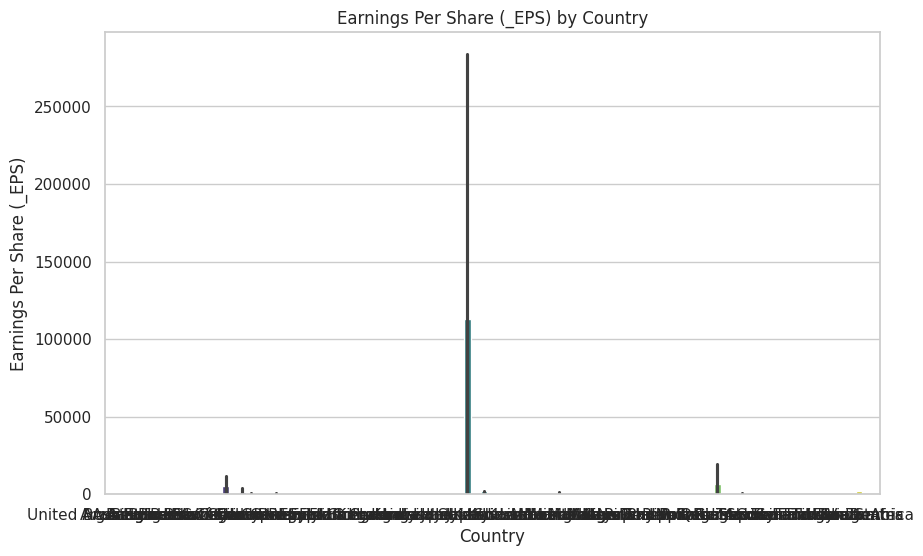

In [21]:
sns.set(style="whitegrid")

# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x="country", y="_EPS", hue="country", data=fltrd_df, palette="viridis", legend=False)
plt.title("Earnings Per Share (_EPS) by Country")
plt.xlabel("Country")
plt.ylabel("Earnings Per Share (_EPS)")
plt.show()

In [22]:
fig3 = px.scatter(fltrd_df, x="_EPS", y="_MV", color="ICBIN",
                  labels={"x": "Earnings Per Share", "y": "Market Value"},
                  title="Earnings Per Share vs Market Value")
fig3.show()

In [23]:
fig = px.bar(fltrd_df, x="country", y="_EPS",
             labels={"x": "Country", "y": "Earnings Per Share"},
             title="Earnings Per Share (_EPS) by Country")

# Adjust figure size and aspect ratio
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    margin=dict(l=50, r=50, b=100, t=100),
    yaxis=dict(zeroline=False, gridwidth=0.5),
    xaxis=dict(zeroline=False, gridwidth=0.5),
)

fig.show()

In [24]:
px.bar(fltrd_df, x ="country", y = "_EPS", labels={"x": "Country", "y": "Earnings Per Share"})

In [25]:
px.bar(fltrd_df, x ="ICBIN", y = "_EPS", labels={"x": "Industry", "y": "Earnings Per Share"})



In [26]:
#new_data = df.drop("startdate", "_MVC", "_WCO1O16", "_WC01075", "_WC01051", "_WC01075", "")

##Partition the dataframe using ai_score:
**fill_df** = dataframe with no missing ai_score values across all.

**missing_df** = dataframe with missing values across  ai_score, _CGSCORE  _CGVSDP050  and 32 other variables

In [27]:
fltrd_df.shape

(85803, 124)

In [28]:
# Filter fill_df where ai_score is not missing
fill_df = fltrd_df[fltrd_df["ai_score"].notna()]

# Filter missing_df where ai_score is missing
missing_df = fltrd_df[fltrd_df["ai_score"].isna()]


In [29]:
fill_df.shape

(76837, 124)

In [30]:
missing_df.shape

(8966, 124)

In [31]:
# This step splits the dataframe along the lines of AI_SCORE.
#fill_df = fltrd_df.dropna(subset=["ai_score"])
#missing_df = fltrd_df[pd.isna(fltrd_df["ai_score"])]


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning:

All-NaN slice encountered



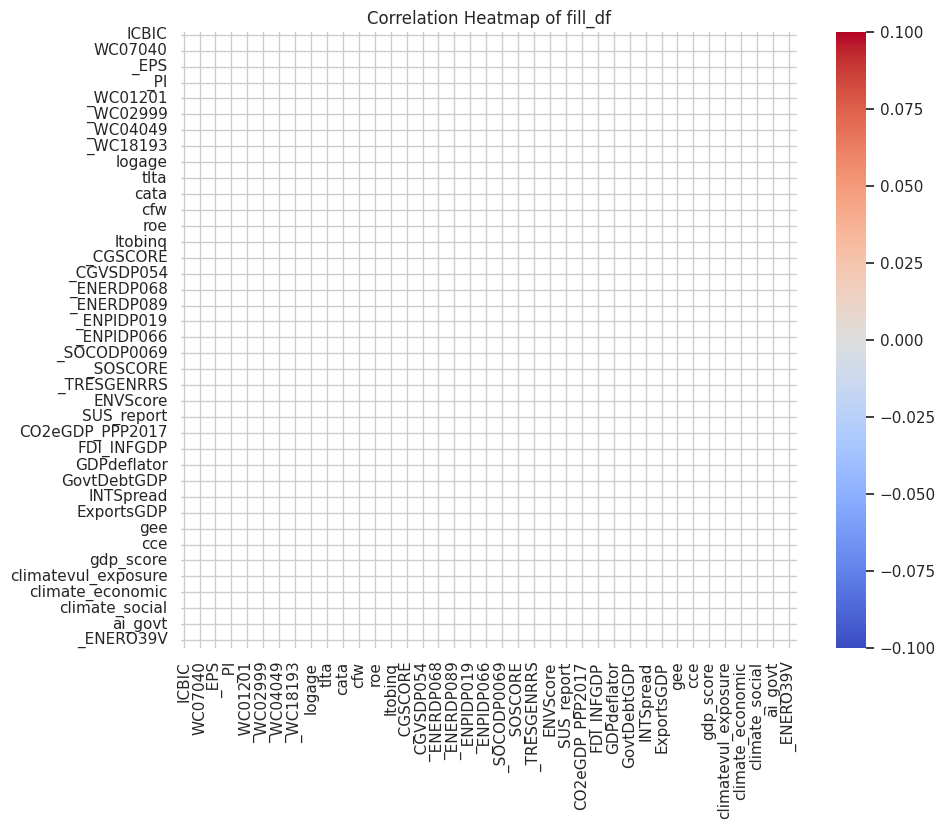

In [32]:
# Filter out columns with all NaN values
numeric_cols = fill_df.select_dtypes(include=['number']).dropna(axis=1, how='all')

# Compute the correlation matrix
corr = numeric_cols.corr()

# Generate a mask for the upper triangle
mask = ~corr.isnull()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True)

# Add title
plt.title('Correlation Heatmap of fill_df')

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning:

All-NaN slice encountered



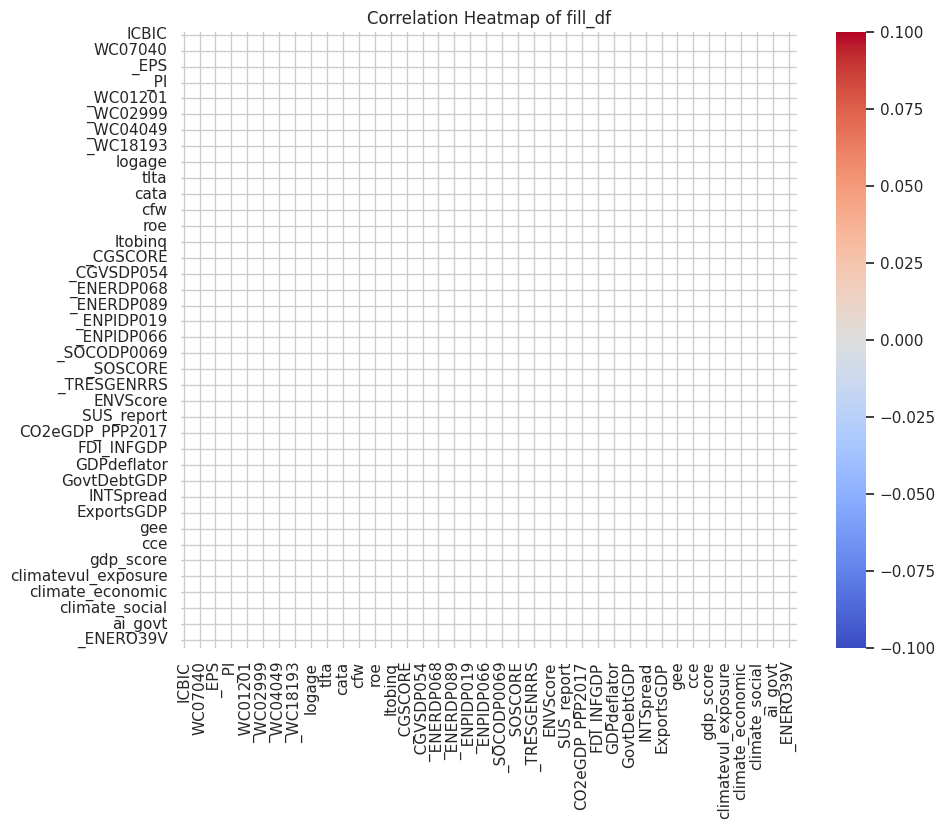

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = fill_df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = numeric_cols.corr()

# Generate a mask for the upper triangle
mask = ~corr.isnull()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True)

# Add title
plt.title('Correlation Heatmap of fill_df')

# Show the plot
plt.show()



In [34]:
fill_df.head()

ticker          ISIN  ICBIC                   ICBIN  fic  \
0  EMAARDEV  AEE001901017     35             Real Estate  ARE   
1      NMDC  AEN000401010     50             Industrials  ARE   
2       NCC  AEN000901019     50             Industrials  ARE   
3      ADNH  AEA000301019     40  Consumer Discretionary  ARE   
4    AGTHIA  AEA001901015     45        Consumer Staples  ARE   

                country                exchange  startyear  WC06011  \
0  United Arab Emirates  Dubai Financial Market     2017.0   2810.0   
1  United Arab Emirates               Abu Dhabi     2003.0   2893.0   
2  United Arab Emirates  Dubai Financial Market     2005.0   2840.0   
3  United Arab Emirates               Abu Dhabi     2003.0   8540.0   
4  United Arab Emirates               Abu Dhabi     2005.0   4690.0   

      WC07040  INCORP  year  _EPS       _MV    _P    _PI     _RI   _WC01001  \
0  35101010.0  2003.0  2020  0.50  11000.00  2.75   47.8   53.83  9758283.0   
1  50101010.0  1979.0  2020  0.83   1502.50  6.01  114.5  239.16  3776232.0   
2  50101030.0  1968.0  2020  0.00    818.06  2.28    9.4   20.15   183087.0   
3  40501025.0  1975.0  2020  0.03   2800.00  2.33   93.0  161.18   874149.0   
4  45102020.0  2005.0  2020  0.05   2550.00  4.25  134.5  179.07  2061216.0   

   _WC01201   _WC01651   _WC02001    _WC02999    _WC03351    _WC03999  \
0       0.0  1657311.0  3349997.0  33708938.0  20209172.0  33708938.0   
1       0.0   351755.0   287568.0   7227648.0   3398578.0   7227648.0   
2       0.0    -3389.0   126982.0   1641412.0    284177.0   1641412.0   
3       0.0   444508.0   591664.0  10644442.0   2883358.0  10644442.0   
4    7219.0    34471.0   775509.0   3140671.0   1212500.0   3140671.0   

   _WC04049    _WC08001   _WC02201  _WC18193     SIC  \
0   18883.0  11000000.0  9393236.0     0.414  1542.0   
1  200849.0   1502500.0  5584543.0     1.407  1629.0   
2   18073.0    818064.0   243738.0    -0.009  3241.0   
3  292233.0   2799996.0   984599.0     0.370  7011.0   
4  133785.0   2550000.0  1662151.0     0.057  2041.0   

                         ffi48   age    logage       size   logsales  \
0                 Construction   4.0  1.386294  17.333273  16.093628   
1                 Construction  18.0  2.890372  15.793425  15.144238   
2       Construction Materials  16.0  2.772589  14.311068  12.117717   
3  Restaraunts, Hotels, Motels  18.0  2.890372  16.180548  13.681006   
4                Food Products  16.0  2.772589  14.959947  14.538807   

       tlta  logmktcap      clta      cata      apta      arta       cfw  \
0  0.599520  17.256222  0.249243  0.278657  0.027537  0.160847  0.065041   
1  0.470219  15.404965  0.414429  0.772664  0.125627  0.672850  0.079969   
2  0.173130  13.912856  0.136847  0.148493  0.011117  0.035720 -0.025346   
3  0.270879  15.553052  0.082537  0.092499  0.024929  0.035816  0.017567   
4  0.386064  15.140594  0.267628  0.529234  0.047770  0.161908  0.056213   

        roa      lroa       roe      lroe    tobinq   ltobinq    mktvalue  \
0  0.064480  0.107370  0.122766  0.218560  0.925843  1.099336  31209172.0   
1  0.051980  0.023701  0.091864  0.051044  0.678101  0.537151   4901078.0   
2 -0.036723 -0.014135 -0.002497  0.051653  0.671520  0.680200   1102241.0   
3 -0.009917  0.011296  0.057274  0.029367  0.533927  0.568472   5683354.0   
4  0.012832  0.039577  0.017878  0.068867  1.197992  1.054555   3762500.0   

         mb  _CGSCORE  _CGVSDP050  _CGVSDP026  _CGVSDP054  _ENERDP0051  \
0  0.925843     38.52         0.0         0.0         0.0          0.0   
1  0.678101       NaN         NaN         NaN         NaN          NaN   
2  0.671520       NaN         NaN         NaN         NaN          NaN   
3  0.533927       NaN         NaN         NaN         NaN          NaN   
4  1.197992       NaN         NaN         NaN         NaN          NaN   

   _ENERDP013  _ENERDP068  _ENERDP070  _ENERDP076  _ENERDP089  _ENERDP123  \
0         0.0         0.0         0.0         0.0         0.0

In [35]:
from sklearn.impute import KNNImputer

# Select columns to fill missing values
selected_columns = ["_ENERDP0051", "_CGSCORE", "_ENERDP123", "CO2eGDP", "CO2eGDP_PPP2017", "CO2eGDP_PPP", "MktCapGDP", "GovtDebtGDP"]

# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputer to fill missing values for selected columns
fill_df.loc[:, selected_columns] = imputer.fit_transform(fill_df[selected_columns])

# Check for missing values after imputation
missing_val = fill_df[selected_columns].isna().sum()
mfill_df = pd.DataFrame(missing_val, columns=["Missing Values"]).T

print("\nMissing values after KNN imputation:")
print(mfill_df)




Missing values after KNN imputation:
                _ENERDP0051  _CGSCORE  _ENERDP123  CO2eGDP  CO2eGDP_PPP2017  \
Missing Values            0         0           0        0                0   

                CO2eGDP_PPP  MktCapGDP  GovtDebtGDP  
Missing Values            0          0            0  


In [36]:
fill_df.head(10)

ticker          ISIN  ICBIC                   ICBIN  fic  \
0  EMAARDEV  AEE001901017     35             Real Estate  ARE   
1      NMDC  AEN000401010     50             Industrials  ARE   
2       NCC  AEN000901019     50             Industrials  ARE   
3      ADNH  AEA000301019     40  Consumer Discretionary  ARE   
4    AGTHIA  AEA001901015     45        Consumer Staples  ARE   
5        DU  AEE000701012     15      Telecommunications  ARE   
6       DPW  AEDFXA0M6V00     50             Industrials  ARE   
7      NCTH  AEN001001017     40  Consumer Discretionary  ARE   
8    BILDCO  AEA000501014     50             Industrials  ARE   
9       FBI  AEF000501013     50             Industrials  ARE   

                country                exchange  startyear  WC06011  \
0  United Arab Emirates  Dubai Financial Market     2017.0   2810.0   
1  United Arab Emirates               Abu Dhabi     2003.0   2893.0   
2  United Arab Emirates  Dubai Financial Market     2005.0   2840.0   
3  United Arab Emirates               Abu Dhabi     2003.0   8540.0   
4  United Arab Emirates               Abu Dhabi     2005.0   4690.0   
5  United Arab Emirates  Dubai Financial Market     2006.0   8210.0   
6  United Arab Emirates          Non NASDAQ OTC     2008.0   7970.0   
7  United Arab Emirates               Abu Dhabi     2003.0   8540.0   
8  United Arab Emirates               Abu Dhabi     2003.0   2840.0   
9  United Arab Emirates               Abu Dhabi     2007.0   2820.0   

      WC07040  INCORP  year  _EPS       _MV     _P    _PI     _RI    _WC01001  \
0  35101010.0  2003.0  2020  0.50  11000.00   2.75   47.8   53.83   9758283.0   
1  50101010.0  1979.0  2020  0.83   1502.50   6.01  114.5  239.16   3776232.0   
2  50101030.0  1968.0  2020  0.00    818.06   2.28    9.4   20.15    183087.0   
3  40501025.0  1975.0  2020  0.03   2800.00   2.33   93.0  161.18    874149.0   
4  45102020.0  2005.0  2020  0.05   2550.00   4.25  134.5  179.07   2061216.0   
5  15102015.0  2005.0  2020  0.40  26064.20   5.75  103.0  186.34  11083845.0   
6  50206060.0  2005.0  2020  1.43  15936.00  19.20  150.7  166.32  31339763.0   
7  40501015.0  1996.0  2020  0.14   1422.41   1.74  345.1  636.94    765442.0   
8  50101035.0  1974.0  2020  0.00     77.70   0.26  104.9  143.36     49872.0   
9  50101035.0  1978.0  2020  0.31    178.14   1.31   57.8   86.10    190465.0   

   _WC01201   _WC01651   _WC02001     _WC02999    _WC03351     _WC03999  \
0       0.0  1657311.0  3349997.0   33708938.0  20209172.0   33708938.0   
1       0.0   351755.0   287568.0    7227648.0   3398578.0    7227648.0   
2       0.0    -3389.0   126982.0    1641412.0    284177.0    1641412.0   
3       0.0   444508.0   591664.0   10644442.0   2883358.0   10644442.0   
4    7219.0    34471.0   775509.0    3140671.0   1212500.0    3140671.0   
5       0.0  1442914.0  2242702.0   15867247.0   7297835.0   15867247.0   
6       0.0  3108760.0  7867884.0  136969273.0  85827628.0  136969273.0   
7       0.0   114778.0   502739.0    2412597.0    576001.0    2412597.0   
8       0.0   -98595.0   163035.0     457336.0    332981.0     457336.0   
9       0.0    40209.0   129552.0     478400.0    111421.0     478400.0   

    _WC04049    _WC08001    _WC02201  _WC18193     SIC  \
0    18883.0  11000000.0   9393236.0     0.414  1542.0   
1   200849.0   1502500.0   5584543.0     1.407  1629.0   
2    18073.0    818064.0    243738.0    -0.009  3241.0   
3   292233.0   2799996.0    984599.0     0.370  7011.0   
4   133785.0   2550000.0   1662151.0     0.057  2041.0   
5  1709406.0  26064209.0   4642799.0     0.318  4812.0   
6  4799659.0     15936.0  16513602.0     3.746  4491.0   
7    36899.0   1422406.0    720031.0     0.140  7011.0   
8     6957.0     77700.0    188073.0    -0.329  3241.0   
9    29760.0    178144.0    219795.0     0.296  3271.0   

                         ffi48   age    logage       size   logsales  \
0                 Construction   4.0  1.386294  17.333273  16.093628   
1     

In [44]:
#fill_df.nunique()

# Assuming fill_df is your DataFrame
# Set max_rows to None to prevent truncation of output
pd.set_option('display.max_rows', None)

# Use the nunique() method to find the number of unique values in each column
unique_values_count = fill_df.apply(lambda x: x.nunique())

# Reset max_rows to its default value
pd.reset_option('display.max_rows')

# Create a DataFrame to display the unique values count
unique_values_df = pd.DataFrame(unique_values_count, columns=["Unique Values"]).T

# Display the number of unique values in each column
print("Number of unique values in each column:")
print(unique_values_df)

Number of unique values in each column:
               ticker   ISIN  ICBIC  ICBIN  fic  country  exchange  startyear  \
Unique Values   22960  27254      9      9   90       90       140         57   

               WC06011  WC07040  INCORP  year   _EPS    _MV     _P    _PI  \
Unique Values      186      149     156     3  15221  64303  19344  16539   

                 _RI  _WC01001  _WC01201  _WC01651  _WC02001  _WC02999  \
Unique Values  45840     59497     25250     57448     57763     62336   

               _WC03351  _WC03999  _WC04049  _WC08001  _WC02201  _WC18193  \
Unique Values     60816     62332     46491     61740     61287     38050   

               SIC  ffi48  age  logage   size  logsales   tlta  logmktcap  \
Unique Values  794     43   59      59  62209     61794  62788      62701   

                clta   cata   apta   arta    cfw    roa   lroa    roe   lroe  \
Unique Values  62843  62728  62902  62321  63030  63035  59264  63023  57348   

               tobinq 

In [45]:
fill_df.describe()

ICBIC     startyear       WC06011       WC07040        INCORP  \
count  76837.000000  76837.000000  76837.000000  7.683700e+04  76837.000000   
mean      39.475188   2002.938571   5328.592970  3.966983e+07   1985.206827   
std       15.754124     11.718743   2171.487381  1.575936e+07     25.977327   
min       10.000000   1964.000000   1310.000000  1.010101e+07   1827.000000   
25%       20.000000   1996.000000   3440.000000  2.010302e+07   1974.000000   
50%       45.000000   2005.000000   4970.000000  4.510202e+07   1993.000000   
75%       50.000000   2013.000000   7320.000000  5.020502e+07   2003.000000   
max       60.000000   2021.000000   8800.000000  6.510202e+07   2020.000000   

               year          _EPS           _MV            _P           _PI  \
count  76837.000000  7.683700e+04  7.683700e+04  7.683700e+04  7.683700e+04   
mean    2020.925739  1.535062e+04  4.743135e+05  6.411417e+03  4.111619e+06   
std        0.792951  2.911387e+06  1.015197e+07  7.261033e+05  3.459286e+08   
min     2020.000000  0.000000e+00  1.000000e-02  0.000000e+00  0.000000e+00   
25%     2020.000000  0.000000e+00  4.082400e+02  4.990000e+00  5.220000e+01   
50%     2021.000000  7.000000e-01  3.787640e+03  3.200000e+01  1.250000e+02   
75%     2022.000000  1.265000e+01  2.549423e+04  6.310000e+02  3.869000e+02   
max     2022.000000  6.152236e+08  1.157469e+09  1.995443e+08  6.926264e+10   

                _RI      _WC01001      _WC01201      _WC01651      _WC02001  \
count  7.683700e+04  7.683700e+04  7.683700e+04  7.683700e+04  7.683700e+04   
mean   2.138166e+20  6.031806e+08  5.128668e+06  4.649552e+07  1.396642e+08   
std    3.421844e+22  6.379109e+09  1.989316e+08  8.084333e+08  1.734092e+09   
min    0.000000e+00  0.000000e+00  0.000000e+00 -5.958943e+10  0.000000e+00   
25%    6.530000e+01  4.151130e+05  0.000000e+00 -1.351000e+03  6.857400e+04   
50%    1.588700e+02  3.460500e+06  0.000000e+00  1.014650e+05  7.214530e+05   
75%    5.414500e+02  3.110800e+07  9.338600e+04  1.191223e+06  6.020000e+06   
max    5.476341e+24  3.040638e+11  3.298917e+10  5.473002e+10  1.246528e+11   

           _WC02999      _WC03351      _WC03999      _WC04049      _WC08001  \
count  7.683700e+04  7.683700e+04  7.683700e+04  7.683700e+04  7.683700e+04   
mean   9.454856e+08  4.883018e+08  9.454856e+08  1.389428e+07  7.500999e+08   
std    1.055716e+10  5.488526e+09  1.055716e+10  2.668762e+08  1.071399e+10   
min    9.000000e+00  0.000000e+00  9.000000e+00 -8.820000e+02  1.000000e-02   
25%    7.178040e+05  2.627880e+05  7.178040e+05  1.950000e+04  4.533230e+05   
50%    5.169563e+06  2.367659e+06  5.169563e+06  1.689000e+05  4.307126e+06   
75%    4.413200e+07  2.010840e+07  4.413200e+07  1.972000e+06  3.199394e+07   
max    5.757778e+11  4.401224e+11  5.757778e+11  3.595210e+10  7.000000e+11   

           _WC02201      _WC18193           SIC           age        logage  \
count  7.683700e+04  7.683700e+04  76837.000000  76837.000000  76837.000000   
mean   3.862197e+08  7.944080e+03   3996.411621     18.987167      2.698325   
std    4.343916e+09  1.201726e+06   2067.049805     11.769579      0.781337   
min    0.000000e+00 -1.286637e+05    111.000000      1.000000      0.000000   
25%    3.021770e+05  7.000000e-03   2752.000000      9.000000      2.197225   
50%    2.372151e+06  9.280000e-01   3585.000000     17.000000      2.833213   
75%    1.973590e+07  1.483200e+01   5084.000000     27.000000      3.295837   
max    2.831167e+11  2.559130e+08   8999.000000     59.000000      4.077538   

               size      logsales          tlta     logmktcap          clta  \
count  76837.000000  76837.000000  76837.000000  76837.000000  76837.000000   
mean      15.484307     15.082484      0.519858     15.840640      0.331353   
std        3.282251      3.441541      0.660012      3.206133      0.571965   
min        2.197225      0.000000      0.000000      2.825537      0.000000   
25%       13.483952     13.086230      0.297882     13.8474

In [46]:
# Save the DataFrame as a CSV file

file_path = "/content/drive/My Drive/fill_df_for_tableau.csv"
file_path2 = "/content/drive/My Drive/missing_df_for_tableau.csv"

fill_df.to_csv(file_path, index=False)
missing_df.to_csv(file_path2, index=False)

In [40]:
xyz = fill_df.isna().sum()
filling_df = pd.DataFrame(xyz, columns=["Missing Values"]).T

print("\nMissing values after filtering:")
print(filling_df)


Missing values after filtering:
                ticker  ISIN  ICBIC  ICBIN  fic  country  exchange  startyear  \
Missing Values       0     0      0      0    0        0         0          0   

                WC06011  WC07040  INCORP  year  _EPS  _MV  _P  _PI  _RI  \
Missing Values        0        0       0     0     0    0   0    0    0   

                _WC01001  _WC01201  _WC01651  _WC02001  _WC02999  _WC03351  \
Missing Values         0         0         0         0         0         0   

                _WC03999  _WC04049  _WC08001  _WC02201  _WC18193  SIC  ffi48  \
Missing Values         0         0         0         0         0    0      0   

                age  logage  size  logsales  tlta  logmktcap  clta  cata  \
Missing Values    0       0     0         0     0          0     0     0   

                apta  arta  cfw  roa  lroa  roe  lroe  tobinq  ltobinq  \
Missing Values     0     0    0    0     0    0     0       0        0   

                mktvalue  mb  _CG

In [41]:
fill_df.describe()

ICBIC     startyear       WC06011       WC07040        INCORP  \
count  76837.000000  76837.000000  76837.000000  7.683700e+04  76837.000000   
mean      39.475188   2002.938571   5328.592970  3.966983e+07   1985.206827   
std       15.754124     11.718743   2171.487381  1.575936e+07     25.977327   
min       10.000000   1964.000000   1310.000000  1.010101e+07   1827.000000   
25%       20.000000   1996.000000   3440.000000  2.010302e+07   1974.000000   
50%       45.000000   2005.000000   4970.000000  4.510202e+07   1993.000000   
75%       50.000000   2013.000000   7320.000000  5.020502e+07   2003.000000   
max       60.000000   2021.000000   8800.000000  6.510202e+07   2020.000000   

               year          _EPS           _MV            _P           _PI  \
count  76837.000000  7.683700e+04  7.683700e+04  7.683700e+04  7.683700e+04   
mean    2020.925739  1.535062e+04  4.743135e+05  6.411417e+03  4.111619e+06   
std        0.792951  2.911387e+06  1.015197e+07  7.261033e+05  3.459286e+08   
min     2020.000000  0.000000e+00  1.000000e-02  0.000000e+00  0.000000e+00   
25%     2020.000000  0.000000e+00  4.082400e+02  4.990000e+00  5.220000e+01   
50%     2021.000000  7.000000e-01  3.787640e+03  3.200000e+01  1.250000e+02   
75%     2022.000000  1.265000e+01  2.549423e+04  6.310000e+02  3.869000e+02   
max     2022.000000  6.152236e+08  1.157469e+09  1.995443e+08  6.926264e+10   

                _RI      _WC01001      _WC01201      _WC01651      _WC02001  \
count  7.683700e+04  7.683700e+04  7.683700e+04  7.683700e+04  7.683700e+04   
mean   2.138166e+20  6.031806e+08  5.128668e+06  4.649552e+07  1.396642e+08   
std    3.421844e+22  6.379109e+09  1.989316e+08  8.084333e+08  1.734092e+09   
min    0.000000e+00  0.000000e+00  0.000000e+00 -5.958943e+10  0.000000e+00   
25%    6.530000e+01  4.151130e+05  0.000000e+00 -1.351000e+03  6.857400e+04   
50%    1.588700e+02  3.460500e+06  0.000000e+00  1.014650e+05  7.214530e+05   
75%    5.414500e+02  3.110800e+07  9.338600e+04  1.191223e+06  6.020000e+06   
max    5.476341e+24  3.040638e+11  3.298917e+10  5.473002e+10  1.246528e+11   

           _WC02999      _WC03351      _WC03999      _WC04049      _WC08001  \
count  7.683700e+04  7.683700e+04  7.683700e+04  7.683700e+04  7.683700e+04   
mean   9.454856e+08  4.883018e+08  9.454856e+08  1.389428e+07  7.500999e+08   
std    1.055716e+10  5.488526e+09  1.055716e+10  2.668762e+08  1.071399e+10   
min    9.000000e+00  0.000000e+00  9.000000e+00 -8.820000e+02  1.000000e-02   
25%    7.178040e+05  2.627880e+05  7.178040e+05  1.950000e+04  4.533230e+05   
50%    5.169563e+06  2.367659e+06  5.169563e+06  1.689000e+05  4.307126e+06   
75%    4.413200e+07  2.010840e+07  4.413200e+07  1.972000e+06  3.199394e+07   
max    5.757778e+11  4.401224e+11  5.757778e+11  3.595210e+10  7.000000e+11   

           _WC02201      _WC18193           SIC           age        logage  \
count  7.683700e+04  7.683700e+04  76837.000000  76837.000000  76837.000000   
mean   3.862197e+08  7.944080e+03   3996.411621     18.987167      2.698325   
std    4.343916e+09  1.201726e+06   2067.049805     11.769579      0.781337   
min    0.000000e+00 -1.286637e+05    111.000000      1.000000      0.000000   
25%    3.021770e+05  7.000000e-03   2752.000000      9.000000      2.197225   
50%    2.372151e+06  9.280000e-01   3585.000000     17.000000      2.833213   
75%    1.973590e+07  1.483200e+01   5084.000000     27.000000      3.295837   
max    2.831167e+11  2.559130e+08   8999.000000     59.000000      4.077538   

               size      logsales          tlta     logmktcap          clta  \
count  76837.000000  76837.000000  76837.000000  76837.000000  76837.000000   
mean      15.484307     15.082484      0.519858     15.840640      0.331353   
std        3.282251      3.441541      0.660012      3.206133      0.571965   
min        2.197225      0.000000      0.000000      2.825537      0.000000   
25%       13.483952     13.086230      0.297882     13.8474

In [42]:
fill_df.columns = fill_df.columns.str.strip()
fill_df.columns

Index(['ticker', 'ISIN', 'ICBIC', 'ICBIN', 'fic', 'country', 'exchange',
       'startyear', 'WC06011', 'WC07040',
       ...
       'climate_governance', 'climate_readiness', 'climate_social',
       'ai_ranking', 'ai_score', 'ai_govt', 'ai_tech', 'ai_infr', '_ENERO39V',
       '_ENERO40V'],
      dtype='object', length=124)

Correlation matrix

In [48]:
!pip install linearmodels
from linearmodels import PanelOLS
import pandas as pd

# Specify the dependent variable
y_var = ["ai_score"]

# Specify the independent variables
x_vars = [
    "ai_score", "ICBIC",
    "WC06011", "WC07040", "INCORP", "year", "_EPS", "_MV", "_P", "_PI",
    "_RI", "_WC01001", "_WC01201", "_WC01651", "_WC02001", "_WC02999",
    "_WC03351", "_WC04049", "_WC08001", "_WC02201", "_WC18193",
]

# Specify the entity and time variables
entity_var = "ticker"
time_var = "year"

# Perform panel regression using PanelOLS
model = PanelOLS(fill_df[y_var], fill_df[x_vars], entity_effects=True, check_rank=False)
result = model.fit()

# Print regression results
print(result)

ValueError: dependent and exog must have the same number of observations. The number of observations in dependent is 76837, and the number of observations in exog is 1613577.

In [ ]:
print(fill_df["ai_score"])

In [ ]:
# Specify the dependent variable using the Patsy formula syntax
y_formula = "ai_score"

# Specify the independent variables
x_vars = ["ticker", "ISIN", "ICBIC", "fic", "country", "exchange", "startyear",
          "WC06011", "WC07040", "INCORP", "year", "_EPS", "_MV", "_P", "_PI",
          "_RI", "_WC01001", "_WC01201", "_WC01651", "_WC02001", "_WC02999",
          "_WC03351", "_WC03999", "_WC04049", "_WC08001", "_WC02201", "_WC18193",
          "SIC", "ffi48", "age", "logage", "size", "logsales", "tlta", "logmktcap",
          "clta", "cata", "apta", "arta", "cfw", "roa", "lroa", "roe", "lroe",
          "tobinq", "ltobinq", "mktvalue", "mb", "_CGSCORE", "_CGVSDP050",
          "_CGVSDP026", "_CGVSDP054", "_ENERDP0051", "_ENERDP013", "_ENERDP068",
          "_ENERDP070", "_ENERDP076", "_ENERDP089", "_ENERDP123", "_ENPIDP015",
          "_ENPIDP019", "_ENPIDP034", "_ENPIDP037", "_ENPIDP066", "_ENPIDP069",
          "_ENSCORE", "_SOCODP0069", "_SODODP0151", "_SOHSD01V", "_SOSCORE",
          "_TRESGS", "_TRESGENERS", "_TRESGENRRS", "EMScore", "logEMScore",
          "ENVScore", "logENVScore", "logGOVScore", "SUS_report", "ESG", "CO2eGDP",
          "CO2eGDP_PPP2017", "CO2eGDP_PPP", "FDI_OUTGDP", "FDI_INFGDP",
          "GDP_K2015", "GDP_Cur", "GDPdeflator", "GDP_percap2015", "MktCapGDP",
          "GovtDebtGDP", "INFL_conpx", "INFL_GDPdeflator", "INTSpread", "LENDINT",
          "ImportsGDP", "ExportsGDP", "vae", "pve", "gee", "rqe", "rle", "cce",
          "ficincome", "hdi_score", "pop_score", "gdp_score", "gain",
          "climatevul_capacity", "climatevul_exposure",
          "climatevul_sensitivity", "climate_vul", "climate_economic",
          "climate_governance", "climate_readiness", "climate_social",
          "ai_ranking", "ai_govt", "ai_tech", "ai_infr", "_ENERO39V",
          "_ENERO40V"]

fill_df.columns = fill_df.columns.str.strip()
# Specify the entity and time variables
entity_var = "ticker"
time_var = "year"

# Set the index of fill_df
fill_df = fill_df.set_index([entity_var, time_var])

# Perform panel regression using PanelOLS
model = PanelOLS.from_formula(f"{y_formula} ~ {' + '.join(x_vars)} + EntityEffects", data=fill_df, drop_absorbed=True)
result = model.fit()

# Print regression results
print(result)
